##Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns


# Dataset Description

📊 Numerical Columns (7):
- Hours_Studied, Attendance, Sleep_Hours, Previous_Scores, Tutoring_Sessions, Physical_Activity, Exam_Score

🧩 Categorical Columns (13):
- Parental_Involvement, Access_to_Resources, Extracurricular_Activities, Motivation_Level,
  Internet_Access, Family_Income, Teacher_Quality*, School_Type, Peer_Influence,
  Learning_Disabilities, Parental_Education_Level*, Distance_from_Home*, Gender
(* = contains missing values)


In [7]:

df = pd.read_csv("/content/StudentPerformanceFactors.csv")

print("Shape:", df.shape)
display(df.head())
display(df.describe(include='all'))
print(df.dtypes)
print(df.isnull().sum())


Shape: (6607, 20)


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
count,6607.000000,6607.000000,6607,6607,6607,6607.00000,6607.000000,6607,6607,6607.000000,6607,6529,6607,6607,6607.000000,6607,6517,6540,6607,6607.000000
unique,NaN,NaN,3,3,2,NaN,NaN,3,2,NaN,3,3,2,3,NaN,2,3,3,2,NaN
top,NaN,NaN,Medium,Medium,Yes,NaN,NaN,Medium,Yes,NaN,Low,Medium,Public,Positive,NaN,No,High School,Near,Male,NaN
freq,NaN,NaN,3362,3319,3938,NaN,NaN,3351,6108,NaN,2672,3925,4598,2638,NaN,5912,3223,3884,3814,NaN
mean,19.975329,79.977448,NaN,NaN,NaN,7.02906,75.070531,NaN,NaN,1.493719,NaN,NaN,NaN,NaN,2.967610,NaN,NaN,NaN,NaN,67.235659
std,5.990594,11.547475,NaN,NaN,NaN,1.46812,14.399784,NaN,NaN,1.230570,NaN,NaN,NaN,NaN,1.031231,NaN,NaN,NaN,NaN,3.890456
min,1.000000,60.000000,NaN,NaN,NaN,4.00000,50.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,55.000000
25%,16.000000,70.000000,NaN,NaN,NaN,6.00000,63.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,65.000000
50%,20.000000,80.000000,NaN,NaN,NaN,7.00000,75.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,67.000000
75%,24.000000,90.000000,NaN,NaN,NaN,8.00000,88.000000,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,69.000000


Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object
Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Leve

# Data Cleaning

In [8]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

def clean_student_data(df, use_onehot=True, normalize=True, remove_outliers=True):
    df = df.copy()
    df.columns = df.columns.str.strip()

    # Fill missing categorical values
    fill_cols = ["Teacher_Quality", "Parental_Education_Level", "Distance_from_Home"]
    for col in fill_cols:
        if col in df.columns:
            df[col] = df[col].fillna("Unknown")

    # Encode categorical features
    cat_cols = df.select_dtypes(include="object").columns.tolist()
    if use_onehot:
        df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
    else:
        le = LabelEncoder()
        for col in cat_cols:
            df[col] = le.fit_transform(df[col])

    # Remove outliers
    if remove_outliers:
        num_cols = df.select_dtypes(include=["int64", "float64"]).columns
        for col in num_cols:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]

    # Normalize
    if normalize:
        num_cols = df.select_dtypes(include=["int64", "float64"]).drop(columns=["Exam_Score"]).columns
        scaler = StandardScaler()
        df[num_cols] = scaler.fit_transform(df[num_cols])

    return df


# Data Vizualization

In [9]:
df_clean = clean_student_data(df, use_onehot=True, normalize=True, remove_outliers=True)
df_clean

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_Low,...,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Parental_Education_Level_Unknown,Distance_from_Home_Moderate,Distance_from_Home_Near,Distance_from_Home_Unknown,Gender_Male
0,0.516070,0.350283,-0.023377,-0.147117,-1.314932,0.037064,67,True,False,False,...,False,True,False,True,False,False,False,True,False,True
1,-0.176485,-1.389206,0.657031,-1.122403,0.718426,1.008430,61,True,False,False,...,False,False,False,False,False,False,True,False,False,False
2,0.689209,1.567925,-0.023377,1.106823,0.718426,1.008430,74,False,True,False,...,True,False,False,False,True,False,False,True,False,True
3,1.554902,0.785155,0.657031,1.594466,-0.298253,1.008430,71,True,False,False,...,False,False,False,True,False,False,True,False,False,True
4,-0.176485,1.046078,-0.703785,-0.704423,1.735105,1.008430,70,False,True,False,...,True,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,0.862347,-0.954334,-0.023377,0.061873,-0.298253,-0.934302,68,False,False,False,...,False,True,False,True,False,False,False,True,False,False
6603,0.516070,-0.345513,0.657031,0.410190,1.735105,-0.934302,69,False,False,False,...,False,True,False,True,False,False,False,True,False,False
6604,-0.003346,0.872129,-0.703785,-0.704423,1.735105,-0.934302,68,False,True,True,...,False,False,False,False,True,False,False,True,False,False
6605,-1.734733,0.524232,-0.703785,1.106823,0.718426,0.037064,68,False,False,False,...,False,True,False,True,False,False,False,False,False,False


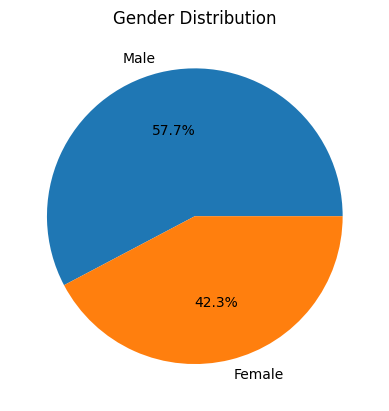

In [10]:
#gender pie chart
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

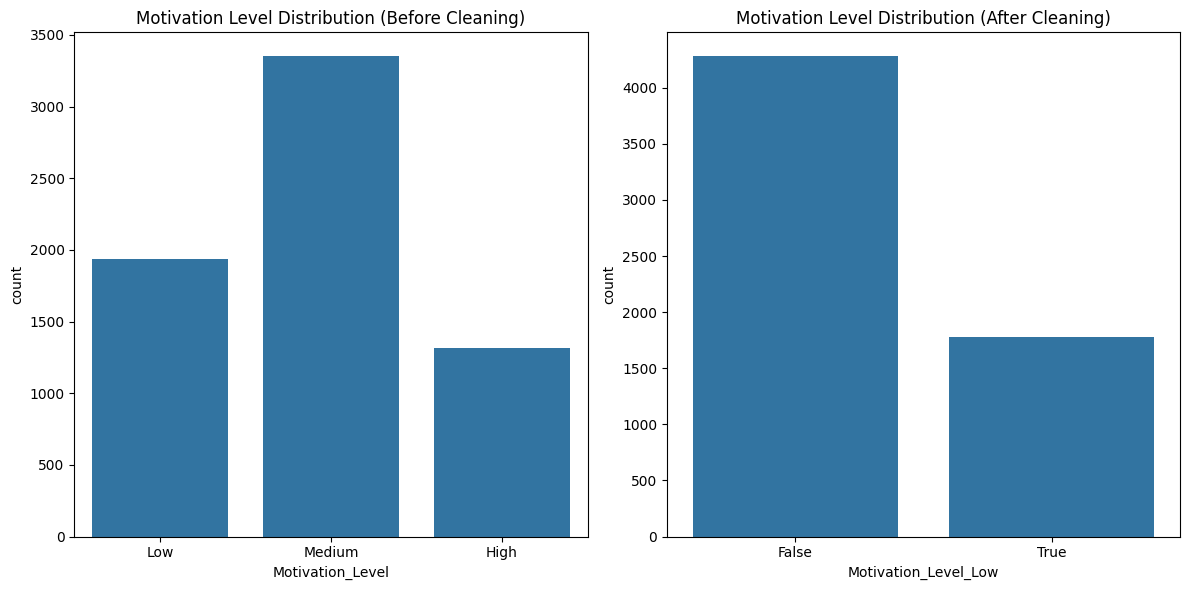

In [11]:
##bar charts for motivation level after cleaning(note motivation level after cleaning are low and medium)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x="Motivation_Level", data=df)
plt.title("Motivation Level Distribution (Before Cleaning)")

plt.subplot(1, 2, 2)
sns.countplot(x="Motivation_Level_Low", data=df_clean)
plt.title("Motivation Level Distribution (After Cleaning)")

plt.tight_layout()
plt.show()




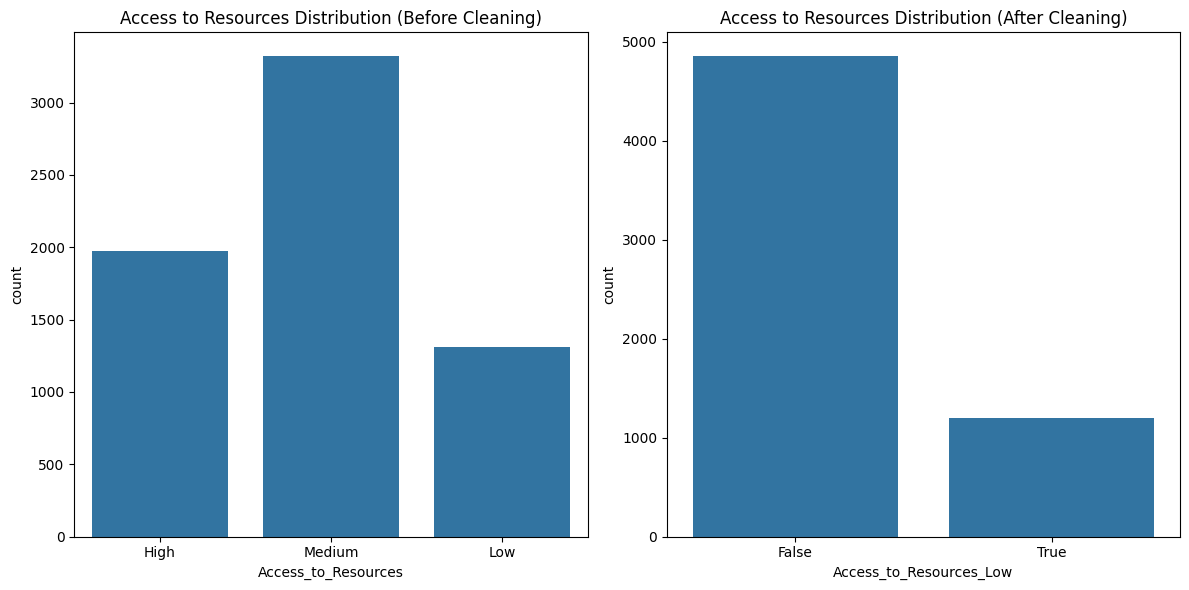

In [12]:
#bar charts for access to resources before and after cleaning
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x="Access_to_Resources", data=df)
plt.title("Access to Resources Distribution (Before Cleaning)")

plt.subplot(1, 2, 2)
sns.countplot(x="Access_to_Resources_Low", data=df_clean)
plt.title("Access to Resources Distribution (After Cleaning)")

plt.tight_layout()
plt.show()



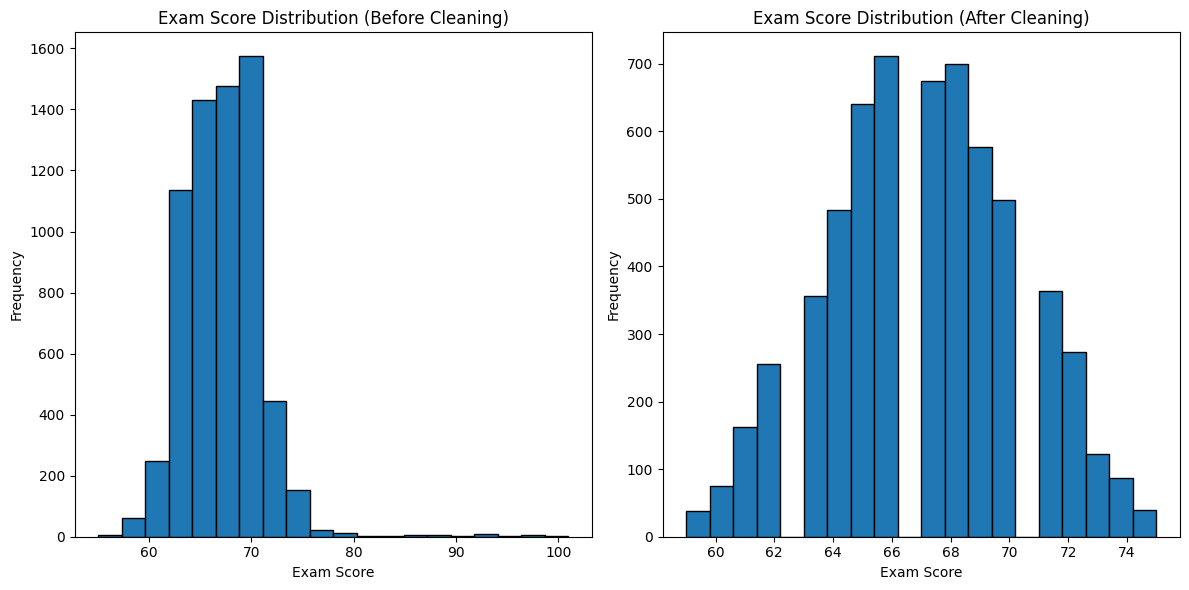

In [13]:
#histogram before and after data cleaning

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['Exam_Score'], bins=20, edgecolor='black')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.title('Exam Score Distribution (Before Cleaning)')

plt.subplot(1, 2, 2)
plt.hist(df_clean['Exam_Score'], bins=20, edgecolor='black')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.title('Exam Score Distribution (After Cleaning)')

plt.tight_layout()
plt.show()


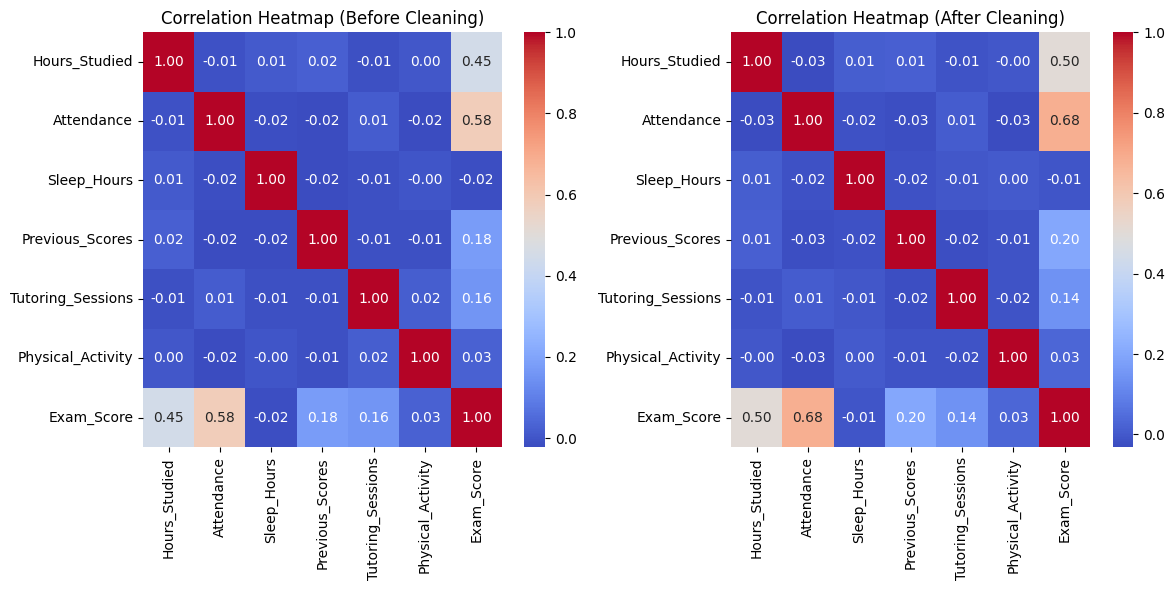

In [14]:
# Correlation heatmap before and after cleaning (int64,float64)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Before Cleaning)')

plt.subplot(1, 2, 2)
sns.heatmap(df_clean.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (After Cleaning)')

plt.tight_layout()
plt.show()


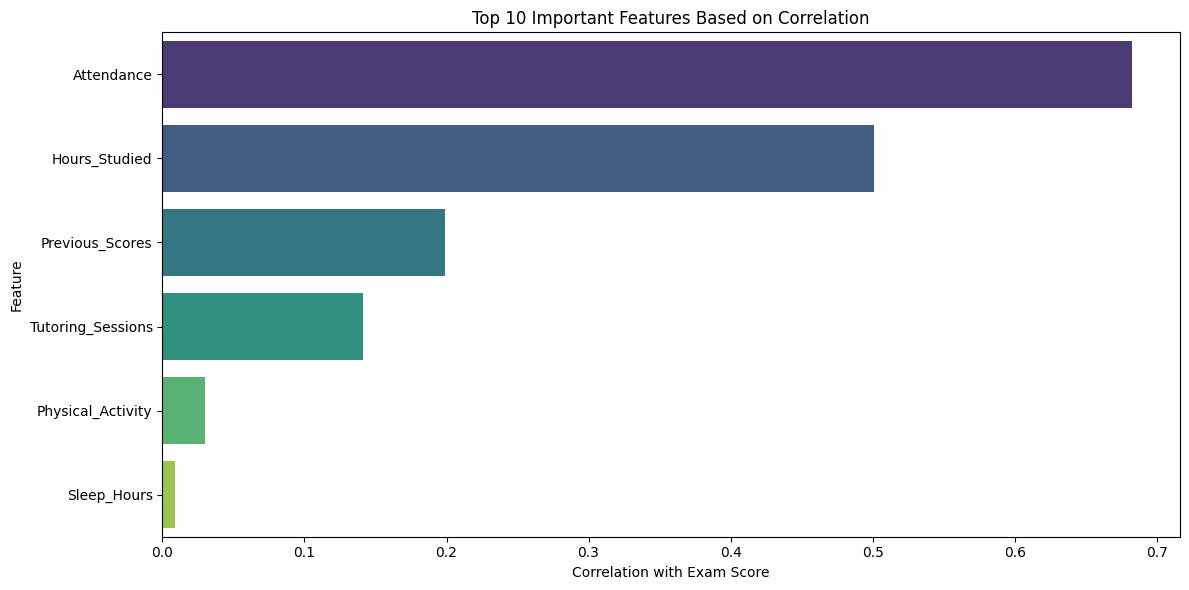

{'Attendance': 0.682256713052748,
 'Hours_Studied': 0.5008092771586218,
 'Previous_Scores': 0.19877525670748836,
 'Tutoring_Sessions': 0.14099858771536172,
 'Physical_Activity': 0.030134541280727126,
 'Sleep_Hours': 0.00910056115250992}

In [15]:
numeric_df = df_clean.select_dtypes(include=["number"])

# Calculate absolute correlation with target
correlations = numeric_df.corr()["Exam_Score"].drop("Exam_Score").abs().sort_values(ascending=False)

# Prepare DataFrame for seaborn barplot
corr_df = correlations.head(10).reset_index()
corr_df.columns = ["Feature", "Correlation"]

# Plot using hue workaround
plt.figure(figsize=(12, 6))
sns.barplot(data=corr_df, x="Correlation", y="Feature", hue="Feature", dodge=False, palette="viridis", legend=False)
plt.xlabel("Correlation with Exam Score")
plt.title("Top 10 Important Features Based on Correlation")
plt.tight_layout()
plt.show()
#list
corr_df = corr_df.set_index('Feature')['Correlation'].to_dict()
corr_df

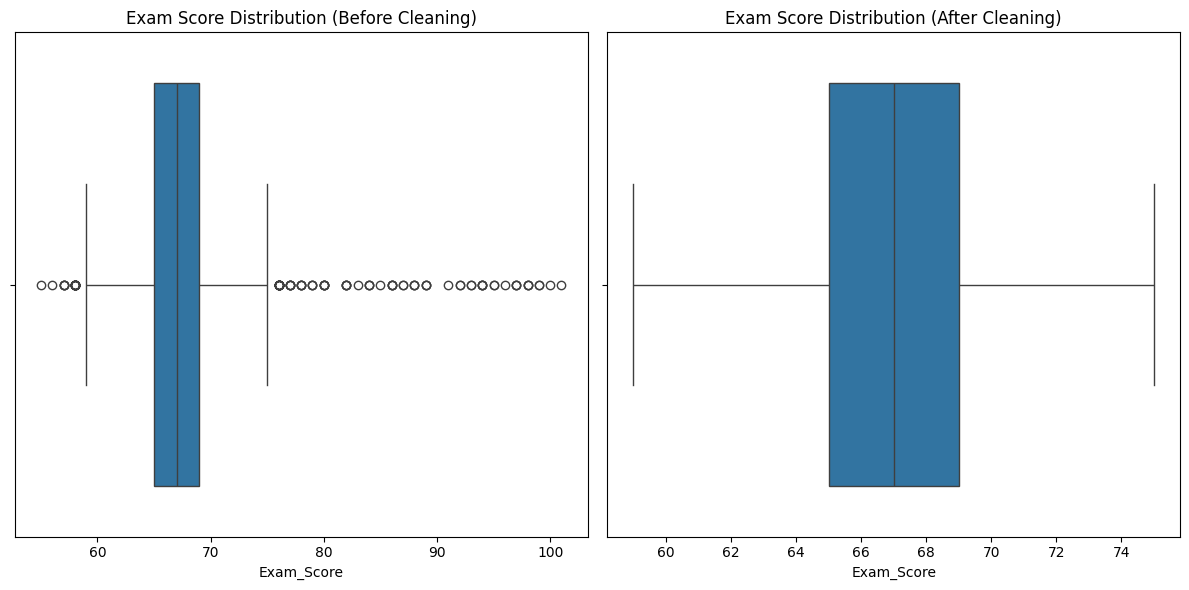

In [16]:
#boxplot before and after data cleaning
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x="Exam_Score", data=df)
plt.title("Exam Score Distribution (Before Cleaning)")

plt.subplot(1, 2, 2)
sns.boxplot(x="Exam_Score", data=df_clean)
plt.title("Exam Score Distribution (After Cleaning)")

plt.tight_layout()
plt.show()


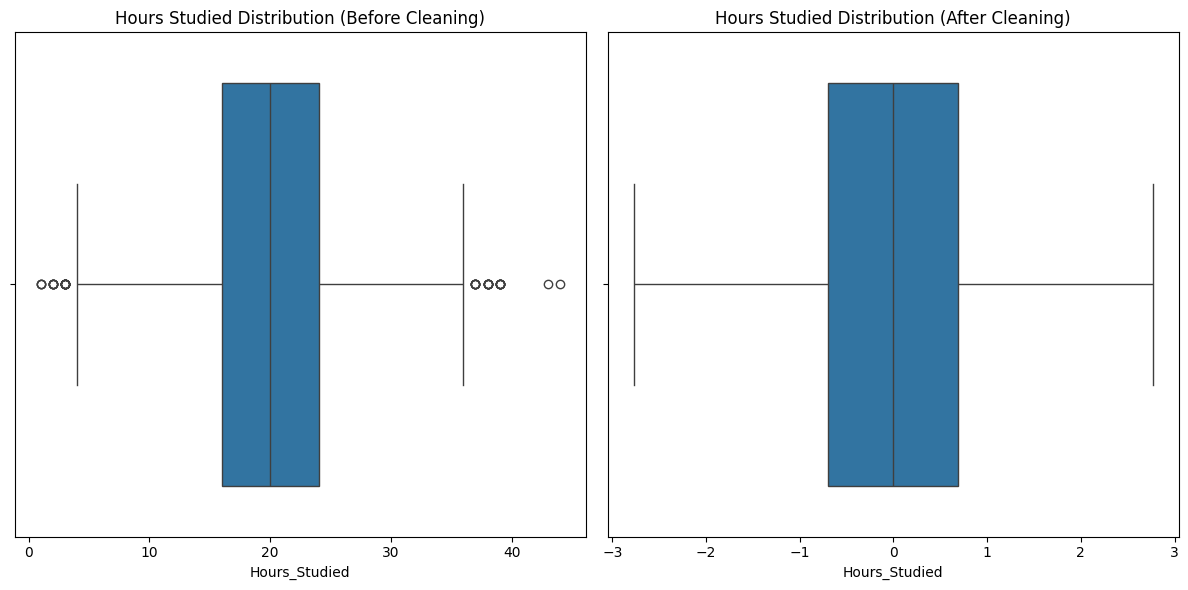

In [17]:
#boxplot before and after data cleaning

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x="Hours_Studied", data=df)
plt.title("Hours Studied Distribution (Before Cleaning)")

plt.subplot(1, 2, 2)
sns.boxplot(x="Hours_Studied", data=df_clean)
plt.title("Hours Studied Distribution (After Cleaning)")

plt.tight_layout()
plt.show()

# Linear Regression

In [18]:
from sklearn.metrics import mean_squared_error, r2_score


data = clean_student_data(df)
X = data.drop(columns=["Exam_Score"])
y = data["Exam_Score"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Linear Regression R²:", r2_score(y_test, y_pred_lr))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

Linear Regression R²: 0.9893302522459221
Linear Regression RMSE: 0.32713080042607245


In [19]:

# Feature selection
features = ["Hours_Studied", "Previous_Scores", "Sleep_Hours", "Attendance","Tutoring_Sessions"]
X = df_clean[features]
y = df_clean["Exam_Score"]

# Train/test
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train2, y_train2)

# Evaluate
y_pred2 = model.predict(X_test2)
print("R²:", r2_score(y_test2, y_pred2))
print("MSE:", mean_squared_error(y_test2, y_pred2))

R²: 0.7875428276772445
MSE: 2.1308855151774635


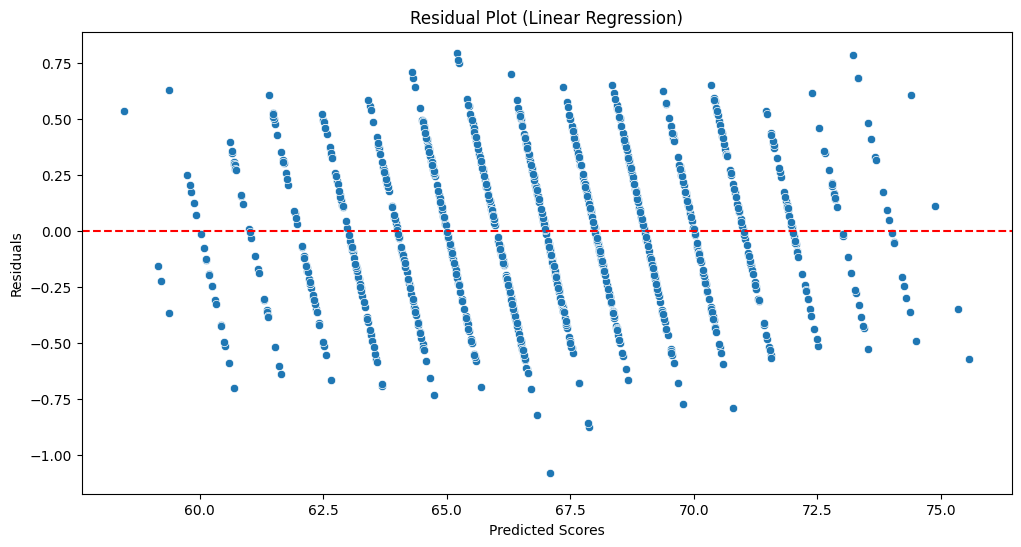

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Residuals
residuals = y_test - y_pred_lr
plt.figure(figsize=(12, 6))

sns.scatterplot(x=y_pred_lr, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Scores")
plt.ylabel("Residuals")
plt.title("Residual Plot (Linear Regression)")
plt.show()

residuals = y_test - y_pred2




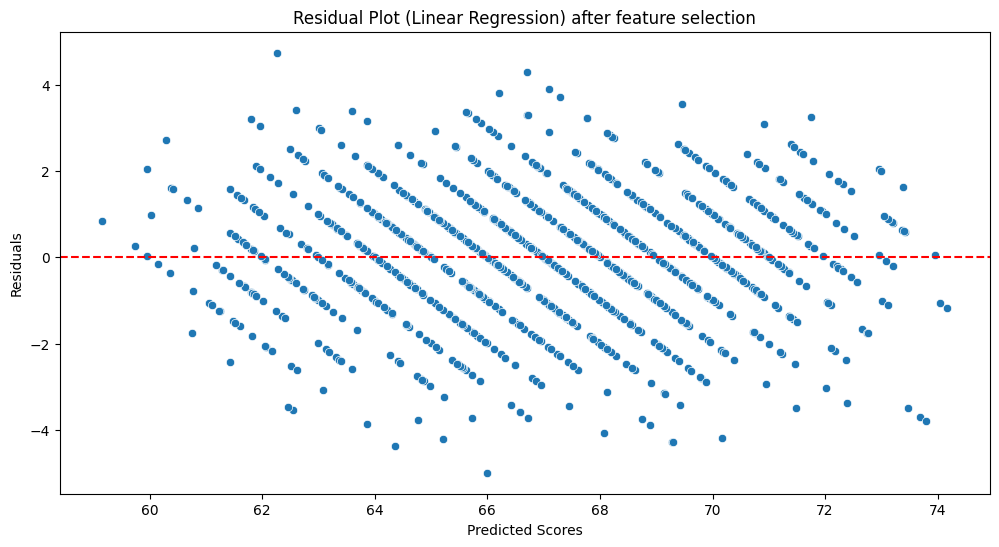

In [21]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x=y_pred2, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Scores")
plt.ylabel("Residuals")
plt.title("Residual Plot (Linear Regression) after feature selection")
plt.show()

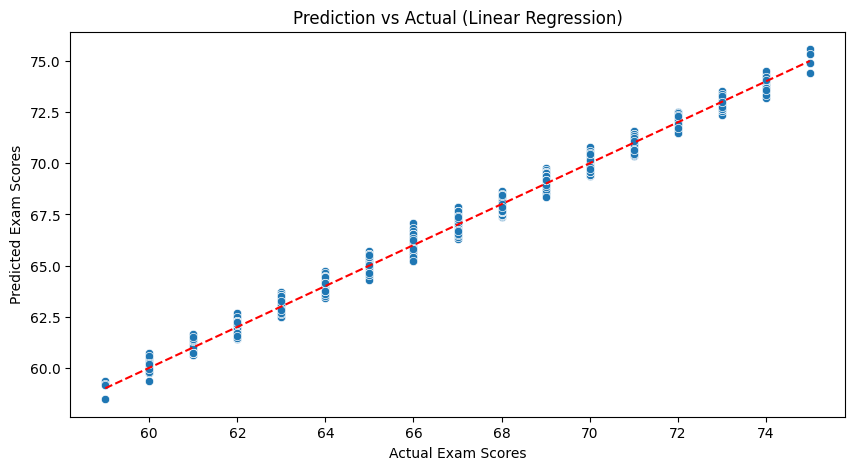

In [22]:
# Prediction vs Actual
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_pred_lr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Prediction vs Actual (Linear Regression)")
plt.show()


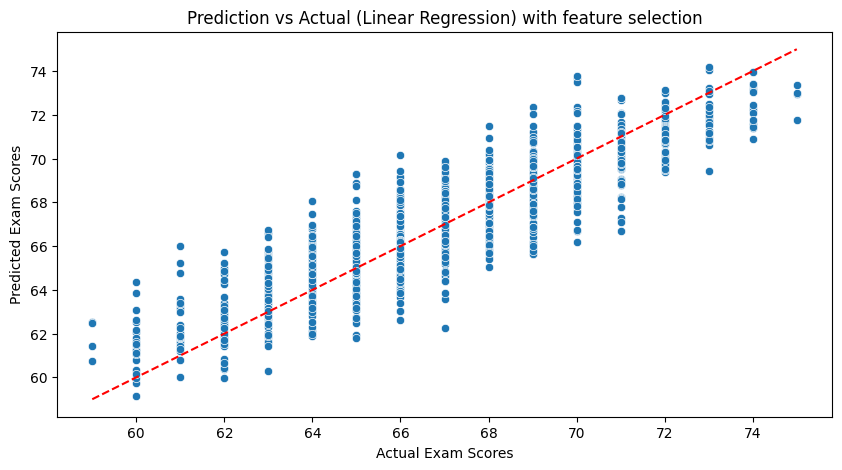

In [23]:
# Prediction vs Actual
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_pred2)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Prediction vs Actual (Linear Regression) with feature selection")
plt.show()


# Polynomial Regression

In [24]:
X = df_clean.drop("Exam_Score", axis=1)
y = df_clean["Exam_Score"]

# Transform features to polynomial (degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Train-test split
from sklearn.model_selection import train_test_split
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predict and evaluate
y_pred_poly = poly_model.predict(X_test_poly)
r2_poly = r2_score(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)

print(f"Polynomial Regression (degree=2) R²: {r2_poly}")
print(f"Polynomial Regression (degree=2) MSE: {mse_poly}")

Polynomial Regression (degree=2) R²: 0.9869248037367157
Polynomial Regression (degree=2) MSE: 0.13114053068167916


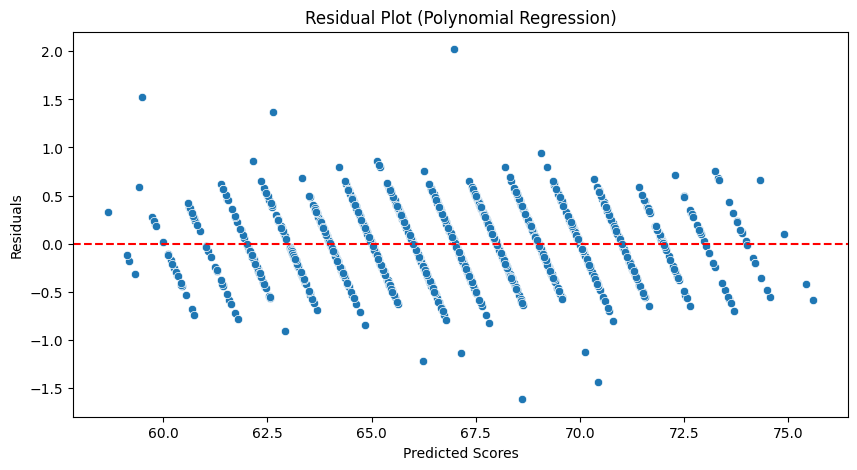

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Residuals
residuals = y_test - y_pred_poly

plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_pred_poly, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Scores")
plt.ylabel("Residuals")
plt.title("Residual Plot (Polynomial Regression)")
plt.show()


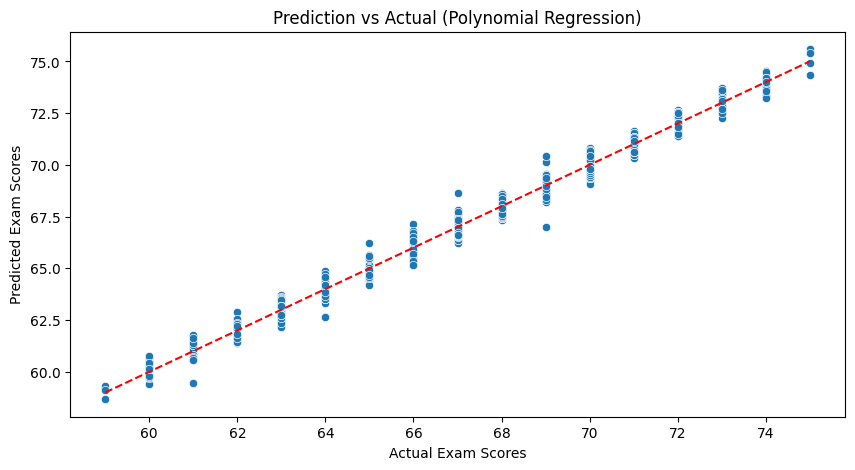

In [26]:
# Prediction vs Actual
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_pred_poly)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Prediction vs Actual (Polynomial Regression)")
plt.show()


# Feature Selection USING LassoCV

In [27]:
from sklearn.linear_model import LassoCV

X = df_clean.drop(columns=['Exam_Score'])
y = df_clean['Exam_Score']

# Train Lasso
lasso = LassoCV(cv=5)
lasso.fit(X, y)

# Get selected features
selected_features = X.columns[(lasso.coef_ != 0)]
print("Selected features:", list(selected_features))

# You can then use only selected features:
X_reduced = X[selected_features]


Selected features: ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Parental_Involvement_Low', 'Parental_Involvement_Medium', 'Access_to_Resources_Low', 'Access_to_Resources_Medium', 'Extracurricular_Activities_Yes', 'Motivation_Level_Low', 'Motivation_Level_Medium', 'Internet_Access_Yes', 'Family_Income_Low', 'Family_Income_Medium', 'Teacher_Quality_Low', 'Teacher_Quality_Medium', 'Teacher_Quality_Unknown', 'Peer_Influence_Neutral', 'Peer_Influence_Positive', 'Learning_Disabilities_Yes', 'Parental_Education_Level_High School', 'Parental_Education_Level_Postgraduate', 'Parental_Education_Level_Unknown', 'Distance_from_Home_Moderate', 'Distance_from_Home_Near', 'Distance_from_Home_Unknown', 'Gender_Male']


In [28]:
from sklearn.model_selection import train_test_split

# Split reduced dataset
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Train Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Evaluate
y_pred_lr = lr.predict(X_test)
print("Linear Regression:")
print("R² Score:", r2_score(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))


Linear Regression:
R² Score: 0.9893336867483512
MSE: 0.10698011349673543


In [29]:
# Polynomial transformation (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train Polynomial Regression (using LinearRegression)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Evaluate
y_pred_poly = poly_model.predict(X_test_poly)
print("\nPolynomial Regression (Degree 2):")
print("R² Score:", r2_score(y_test, y_pred_poly))
print("MSE:", mean_squared_error(y_test, y_pred_poly))



Polynomial Regression (Degree 2):
R² Score: 0.9873853418950471
MSE: 0.12652146284769564


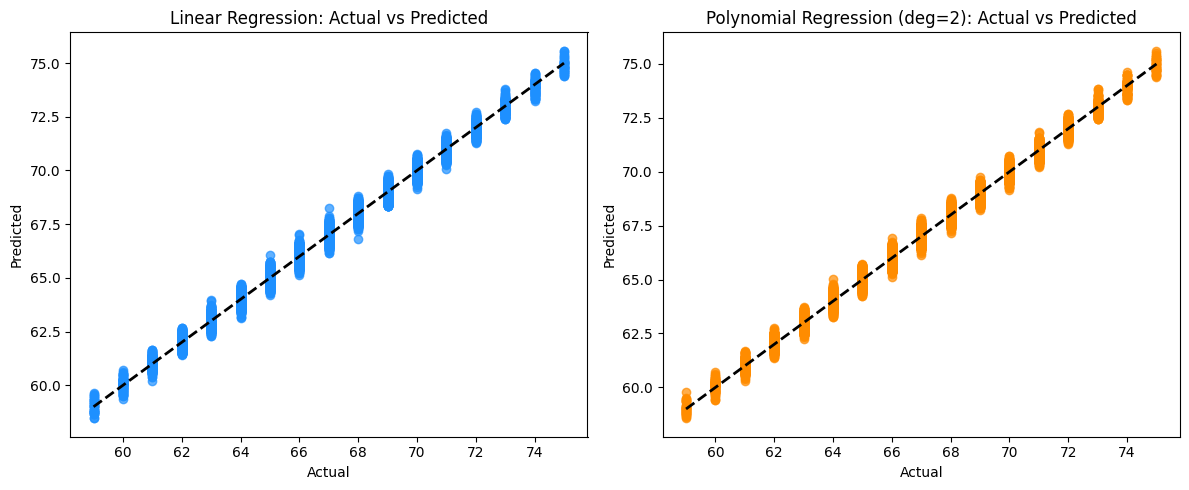

In [30]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Train Linear Regression
lin_model = LinearRegression()
lin_model.fit(X_reduced, y)
y_pred_lin = lin_model.predict(X_reduced)

# Train Polynomial Regression (degree=2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_reduced)
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
y_pred_poly = poly_model.predict(X_poly)

# Plotting
plt.figure(figsize=(12, 5))

# Linear
plt.subplot(1, 2, 1)
plt.scatter(y, y_pred_lin, alpha=0.7, color='dodgerblue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs Predicted')

# Polynomial
plt.subplot(1, 2, 2)
plt.scatter(y, y_pred_poly, alpha=0.7, color='darkorange')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Polynomial Regression (deg=2): Actual vs Predicted')

plt.tight_layout()
plt.show()


# Streamlit

In [82]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

st.set_page_config(page_title="Student Score Predictor", layout="wide")
st.title("🎓 Student Final Score Predictor")

# Load dataset
df = pd.read_csv("/content/StudentPerformanceFactors.csv")

# Streamlit tabs
tab1, tab2, tab3 = st.tabs(["📊 EDA Plots and Visualizations", "📈 Model Evaluation and Insights", "🔮 Prediction Tab"])

with tab1:
    st.header("📊 Exploratory Data Analysis")
    st.subheader("Data Preview")
    st.dataframe(df.head())

    st.subheader("Correlation Heatmap")
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", ax=ax)
    st.pyplot(fig)

    st.subheader("Feature Distributions")
    selected_plot_col = st.selectbox("Select Feature to Plot", df.columns)
    fig2, ax2 = plt.subplots(figsize=(3,3))
    sns.histplot(df[selected_plot_col], kde=True, ax=ax2)
    st.pyplot(fig2)

    st.subheader("Gender Distribution")
    gender_counts = df['Gender'].value_counts()
    fig3, ax3 = plt.subplots()
    fig3.set_size_inches(3, 3)
    ax3.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
    ax3.set_title('Gender Distribution')
    st.pyplot(fig3)

    # MOST IMPORTANT FEATURES USING COLUMN CHART
    numeric_df = df.select_dtypes(include=["number"])
    if "Exam_Score" in numeric_df.columns:
        correlations = numeric_df.corr()["Exam_Score"].drop("Exam_Score").abs().sort_values(ascending=False)
        corr_df = correlations.head(10).reset_index()
        corr_df.columns = ["Feature", "Correlation"]

        plt.figure(figsize=(3, 3))
        sns.barplot(data=corr_df, x="Correlation", y="Feature", hue="Feature", dodge=False, palette="viridis", legend=False)
        plt.xlabel("Correlation with Exam Score")
        plt.title("Top 10 Important Features Based on Correlation")
        plt.tight_layout()
        st.pyplot(plt)

with tab2:
    st.header("📈 Model Evaluation and Insights")

    all_features = df.columns.tolist()
    target_col = st.selectbox("🎯 Select Target Variable", all_features, index=len(all_features)-1)
    feature_candidates = [f for f in all_features if f != target_col]
    selected_features = st.multiselect("🧮 Select Features for Prediction", feature_candidates, default=feature_candidates[:2])

    if not selected_features:
        st.warning("Please select at least one feature for prediction.")
        st.stop()

    if st.button("Select All Features"):
        selected_features = feature_candidates

    if selected_features:
        X = df[selected_features]
        y = df[target_col]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        col1, col2 = st.columns(2)

        with col1:
            st.subheader("Linear Regression")
            lin_model = LinearRegression()
            lin_model.fit(X_train, y_train)
            y_pred_lin = lin_model.predict(X_test)
            st.markdown(f"**R² Score:** {r2_score(y_test, y_pred_lin):.2f}")
            st.markdown(f"**MSE:** {mean_squared_error(y_test, y_pred_lin):.2f}")
            fig_lin, ax_lin = plt.subplots(figsize=(5, 3))
            ax_lin.scatter(y_test, y_pred_lin, color='blue')
            ax_lin.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
            ax_lin.set_xlabel("Actual")
            ax_lin.set_ylabel("Predicted")
            ax_lin.set_title("Linear Regression Predictions")
            st.pyplot(fig_lin)

        with col2:
            st.subheader("Polynomial Regression (Degree 2)")
            poly_model = make_pipeline(PolynomialFeatures(2), LinearRegression())
            poly_model.fit(X_train, y_train)
            y_pred_poly = poly_model.predict(X_test)
            st.markdown(f"**R² Score:** {r2_score(y_test, y_pred_poly):.2f}")
            st.markdown(f"**MSE:** {mean_squared_error(y_test, y_pred_poly):.2f}")
            fig_poly, ax_poly = plt.subplots(figsize=(5, 3))
            ax_poly.scatter(y_test, y_pred_poly, color='green')
            ax_poly.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
            ax_poly.set_xlabel("Actual")
            ax_poly.set_ylabel("Predicted")
            ax_poly.set_title("Polynomial Regression Predictions")
            st.pyplot(fig_poly)

        st.subheader("LassoCV Regression")
        lasso = LassoCV(cv=5)
        lasso.fit(X_train, y_train)
        y_pred_lasso = lasso.predict(X_test)
        st.markdown(f"**Best Alpha:** {lasso.alpha_:.5f}")
        st.markdown(f"**R² Score:** {r2_score(y_test, y_pred_lasso):.2f}")
        st.markdown(f"**MSE:** {mean_squared_error(y_test, y_pred_lasso):.2f}")
        fig_lasso, ax_lasso = plt.subplots(figsize=(2, 2))
        ax_lasso.scatter(y_test, y_pred_lasso, color='red')
        ax_lasso.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
        ax_lasso.set_xlabel("Actual")
        ax_lasso.set_ylabel("Predicted")
        ax_lasso.set_title("LassoCV Predictions")
        st.pyplot(fig_lasso)

with tab3:
    st.header("🔮 Make Predictions")
    if selected_features:
        st.markdown("Enter values below to make a prediction using the Linear Regression model.")
        input_data = {}
        for feature in selected_features:
            input_data[feature] = st.number_input(f"{feature}", value=float(df[feature].mean()))
        input_df = pd.DataFrame([input_data])
        prediction = lin_model.predict(input_df)[0]
        st.success(f"Predicted Final Score: {prediction:.2f}")


Writing app.py


In [33]:
!wget -q -O - https://loca.lt/mytunnelpassword

35.236.172.254

In [ ]:
#RUN APP
!streamlit run app.py & npx localtunnel --port 8501 --subdomain student-performance





⠙⠹⠸⠼⠴⠦
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.236.172.254:8501

⠧⠇⠏⠋⠙⠹⠸⠼your url is: https://student-performance.loca.lt
